In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

**Отток клиентов телекоммуникационных компаний**


**0. Описания задачи.**
Задача: Прогнозирование оттока клиентов телекоммуникационной компании. Предсказываем будет ли клиент расторгать контракт с телеком-компанией в ближайшем будущем.
Имеем 7,043 клиентов, 21 признак и 2 класса.

Уходят: 1,869 клиентов (26.5%)юОстаются: 5,174 клиента (73.5%)



In [345]:
url = "https://raw.githubusercontent.com/ilya-agafonov/machine-learning/refs/heads/main/Telco%20Customer%20Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data_raw = pd.read_csv(url)

In [346]:
data_raw.shape

(7043, 21)

In [347]:
data_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [348]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [349]:
data_raw.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [350]:
data_raw['gender']

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7038,Male
7039,Female
7040,Female
7041,Male


**2. Разбить данные на обучающую и тестовую выборки**

In [351]:
data_clean = data_raw.drop('customerID', axis=1)

X = data_clean.drop('Churn', axis=1)
y = data_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(5282, 1761)

**3. Визуализировать данные и вычислить основные характеристики**

Распределение целевой переменной Churn

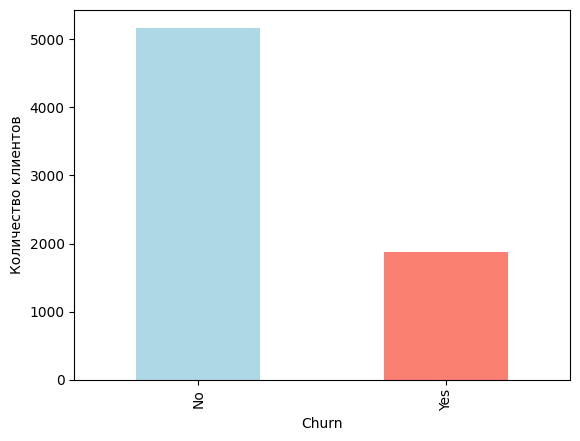

In [352]:
data_raw['Churn'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.xlabel('Churn')
plt.ylabel('Количество клиентов')
plt.show()



Диаграмма рассеивания

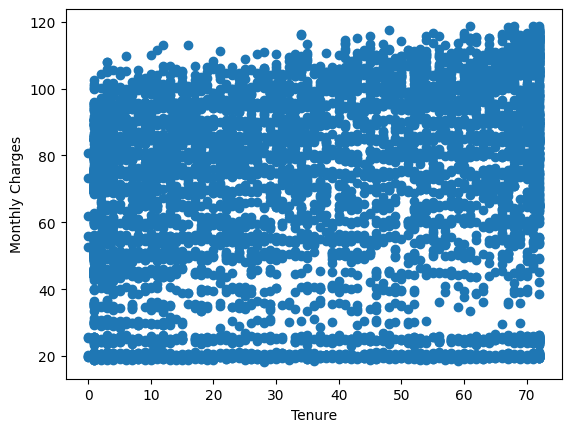

In [353]:
data_plot = data_raw.copy()
data_plot['TotalCharges'] = pd.to_numeric(data_plot['TotalCharges'], errors='coerce')

plt.scatter(data_plot['tenure'], data_plot['MonthlyCharges'])
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
pass

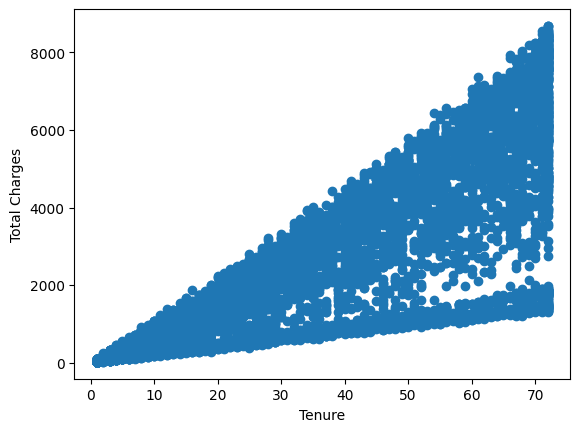

In [354]:
plt.scatter(data_plot['tenure'], data_plot['TotalCharges'])
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
pass

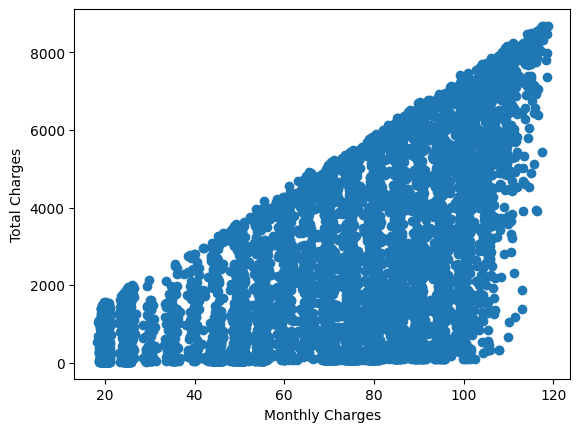

In [355]:
plt.scatter(data_plot['MonthlyCharges'], data_plot['TotalCharges'])
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
pass

 Корреляционная матрица

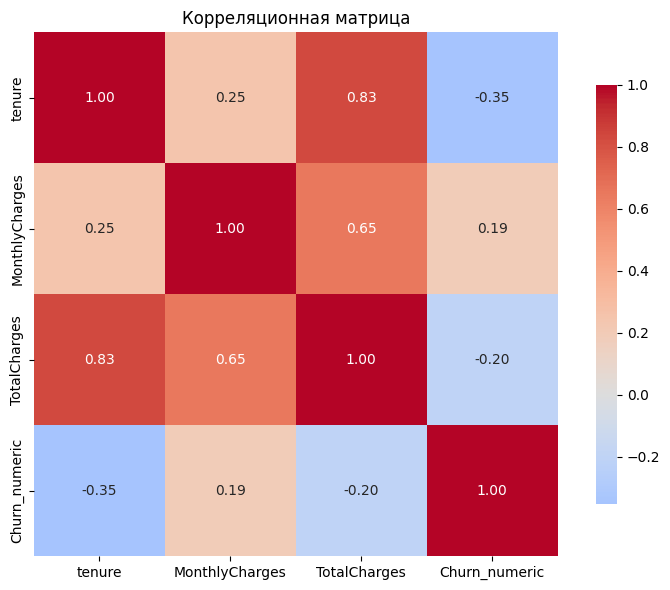

In [356]:
numeric_data = data_plot[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
numeric_data['Churn_numeric'] = data_plot['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(8, 6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

In [357]:
numeric_stats = data_plot[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()
print(numeric_stats)

print("Корреляция с оттоком:")
print(f"Tenure: {correlation_matrix.loc['tenure', 'Churn_numeric']:.3f}")
print(f"MonthlyCharges: {correlation_matrix.loc['MonthlyCharges', 'Churn_numeric']:.3f}")
print(f"TotalCharges: {correlation_matrix.loc['TotalCharges', 'Churn_numeric']:.3f}")

print(f"Размеры выборки:")
print(f"Обучающая: {X_train.shape[0]}")
print(f"Тестовая: {X_test.shape[0]}")
print(f"Всего: {len(data_raw)}")

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000
Корреляция с оттоком:
Tenure: -0.352
MonthlyCharges: 0.193
TotalCharges: -0.199
Размеры выборки:
Обучающая: 5282
Тестовая: 1761
Всего: 7043


**4. Обработка пропущенных значений**

In [358]:
data_raw['TotalCharges'] = pd.to_numeric(data_raw.TotalCharges, errors='coerce')
data_raw.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [359]:
data_raw.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Ищем пустые строки и заполняем медианным значением

In [360]:
data_clean = data_raw.copy()
data_clean['TotalCharges'] = pd.to_numeric(data_clean['TotalCharges'], errors='coerce')

print(f"Пропуски в TotalCharges: {data_clean['TotalCharges'].isnull().sum()}")

imp_num = SimpleImputer(strategy='median')
data_clean[['TotalCharges']] = imp_num.fit_transform(data_clean[['TotalCharges']])

print(f"После обработки - пропуски: {data_clean['TotalCharges'].isnull().sum()}")

data_clean = data_clean.drop('customerID', axis=1)
X = data_clean.drop('Churn', axis=1)
y = data_clean['Churn']

Пропуски в TotalCharges: 11
После обработки - пропуски: 0


**5. Обработать категориальные признаки**

In [361]:
print(X.dtypes.value_counts())
print(f"\nВсего признаков: {X.shape[1]}")

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

print(f"\nКатегориальные признаки ({len(categorical_cols)}):")
print(list(categorical_cols))
print(f"\nЧисловые признаки ({len(numerical_cols)}):")
print(list(numerical_cols))

object     15
int64       2
float64     2
Name: count, dtype: int64

Всего признаков: 19

Категориальные признаки (15):
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Числовые признаки (4):
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Уникальные значения в категориальных признаках

In [362]:
for col in categorical_cols:
    unique_vals = X[col].unique()
    print(f"{col}: {len(unique_vals)} значений")
    print(f"{list(unique_vals)}")

gender: 2 значений
['Female', 'Male']
Partner: 2 значений
['Yes', 'No']
Dependents: 2 значений
['No', 'Yes']
PhoneService: 2 значений
['No', 'Yes']
MultipleLines: 3 значений
['No phone service', 'No', 'Yes']
InternetService: 3 значений
['DSL', 'Fiber optic', 'No']
OnlineSecurity: 3 значений
['No', 'Yes', 'No internet service']
OnlineBackup: 3 значений
['Yes', 'No', 'No internet service']
DeviceProtection: 3 значений
['No', 'Yes', 'No internet service']
TechSupport: 3 значений
['No', 'Yes', 'No internet service']
StreamingTV: 3 значений
['No', 'Yes', 'No internet service']
StreamingMovies: 3 значений
['No', 'Yes', 'No internet service']
Contract: 3 значений
['Month-to-month', 'One year', 'Two year']
PaperlessBilling: 2 значений
['Yes', 'No']
PaymentMethod: 4 значений
['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


In [363]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"{X.shape}")
print(f"{X_encoded.shape}")

(7043, 19)
(7043, 30)


Анализ целевой переменной

In [364]:
churn_distribution = data_raw['Churn'].value_counts()
print(churn_distribution)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [365]:
y_encoded = y.map({'Yes': 1, 'No': 0})
print(y_encoded.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [366]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (5282, 30)
X_test: (1761, 30)


**6.Провести нормализацию**

In [367]:
scaler = StandardScaler()

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (5282, 30)
X_test_scaled shape: (1761, 30)


**7. Запустить классификатор ближайших соседей**

KNN

In [368]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

**8.Вычислить ошибки на обучающей и тестовой выборках. Напечатайте матрицы рассогласования. Выбрать оптимальное значение гиперпараметра**

In [369]:
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке:  {test_accuracy:.4f}")

Точность на обучающей выборке: 0.8334
Точность на тестовой выборке:  0.7666


Матрица рассогласования, k = 5.

[[1093  201]
 [ 210  257]]


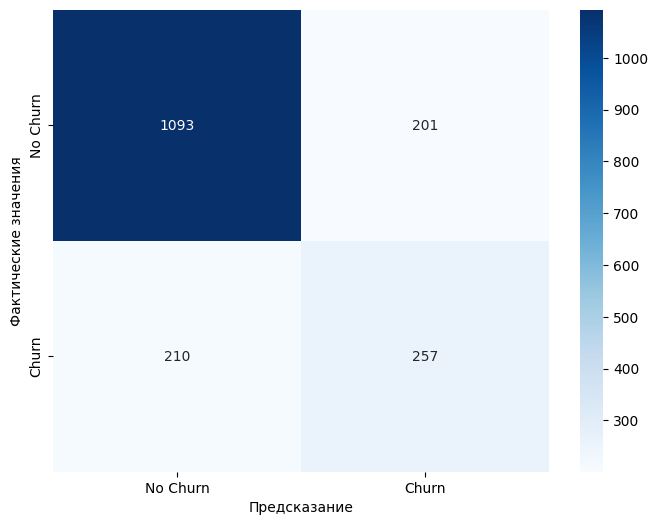

In [370]:
cm_basic = confusion_matrix(y_test, y_test_predict)
print(cm_basic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('Фактические значения')
plt.xlabel('Предсказание')
plt.show()

1093 - правильно предсказали 'No Churn', 201 - ошибочно предсказали 'Churn', 210 - пропустили 'Churn', 257 - правильно предсказали 'Churn'

Подбор

In [371]:
k_range = range(1, 30)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

optimal_k = k_range[np.argmax(test_scores)]
optimal_score = max(test_scores)

print(f"Оптимальное значение k: {optimal_k}")
print(f"Лучшая точность на тесте: {optimal_score:.4f}")

Оптимальное значение k: 28
Лучшая точность на тесте: 0.8012


Зависимость точности от количества соседей

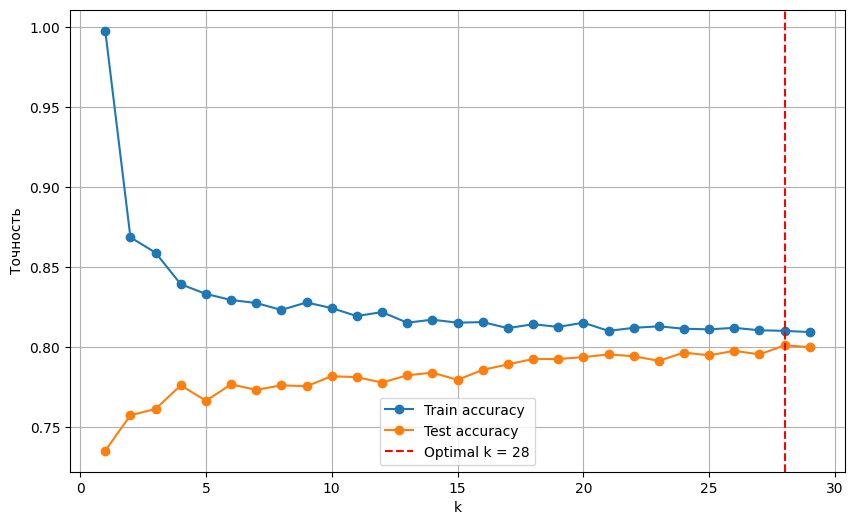

In [372]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, 'o-', label='Train accuracy')
plt.plot(k_range, test_scores, 'o-', label='Test accuracy')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('k')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)
plt.show()

k = 28
Точность на тесте: 0.8012
[[1145  149]
 [ 201  266]]


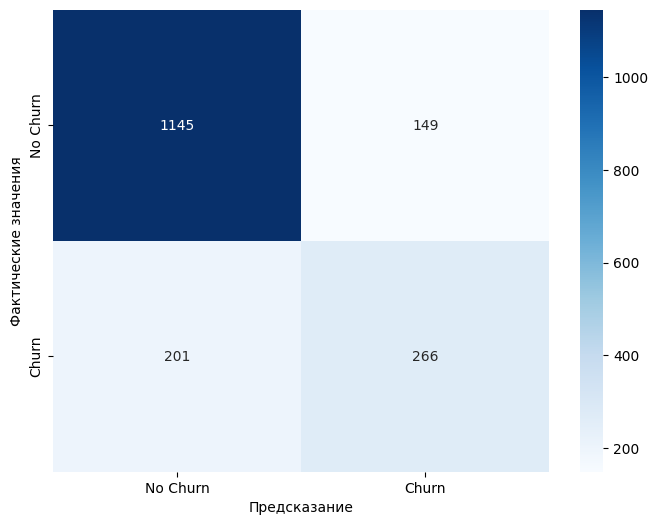

In [373]:
modelopt = KNeighborsClassifier(n_neighbors=optimal_k)
modelopt.fit(X_train_scaled, y_train)

y_pred_final = modelopt.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"k = {optimal_k}")
print(f"Точность на тесте: {final_accuracy:.4f}")

cm_final = confusion_matrix(y_test, y_pred_final)
print(cm_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('Фактические значения')
plt.xlabel('Предсказание')
plt.show()

Теперь лучше определяет остающихся клиентов(No churn) и чуть лучше уходящих клиентов (Churn). Уменьшилось ложное предсказание

С помощью оптимального параметра модель KNN теперь имеет точность 0.8. Текущая проблема это то, что модель ложноп предсказывает 201 из 467 клиентов, это 43% упущенных клиентов.